# Bank card activations prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import linear_model

import functions

%load_ext autoreload
%autoreload 2

In [2]:
def split_best_iv(data, feature, target_name):
    best_iv = 0
    for i in range(2, 20):
        iv_temp = cont_split(data, feature, target_name, i, auto_calc=True)
        if iv_temp == None:
            return cont_split(data, feature, target_name, i - 1)
        if iv_temp > best_iv:
            best_iv = iv_temp
        else:
            return cont_split(data, feature, target_name, i - 1)

In [3]:
%%time
data = pd.read_excel('data set.xls', sheet_name='данные')

CPU times: user 2.95 s, sys: 75.4 ms, total: 3.03 s
Wall time: 3.52 s


In [4]:
data.loc[data['EDUCATION'] == 'Среднее специальное', 'EDUCATION'] = 'Professional School'
data.loc[data['EDUCATION'] == 'Среднее', 'EDUCATION'] = 'Some High School'
data.loc[data['EDUCATION'] == 'Неполное среднее', 'EDUCATION'] = 'Some Primary School'
data.loc[data['EDUCATION'] == 'Высшее', 'EDUCATION'] = 'Undergraduate Degree'
data.loc[data['EDUCATION'] == 'Неоконченное высшее', 'EDUCATION'] = 'No Formal Education'
data.loc[data['EDUCATION'] == 'Два и более высших образования', 'EDUCATION'] = 'Post-Graduate Work'
data.loc[data['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Graduate Degree'

data.loc[data['MARITAL_STATUS'] == 'Состою в браке', 'MARITAL_STATUS'] = 'Married'
data.loc[data['MARITAL_STATUS'] == 'Гражданский брак', 'MARITAL_STATUS'] = 'Partner'
data.loc[data['MARITAL_STATUS'] == 'Разведен(а)', 'MARITAL_STATUS'] = 'Separated'
data.loc[data['MARITAL_STATUS'] == 'Не состоял в браке', 'MARITAL_STATUS'] = 'Single'
data.loc[data['MARITAL_STATUS'] == 'Вдовец/Вдова', 'MARITAL_STATUS'] = 'Widowed'

data.loc[data['GEN_INDUSTRY'] == 'Металлургия/Промышленность/Машиностроение', 'GEN_INDUSTRY'] = 'Iron & Steel'
data.loc[data['GEN_INDUSTRY'] == 'Строительство', 'GEN_INDUSTRY'] = 'Construction - Raw Materials'
data.loc[data['GEN_INDUSTRY'] == 'Нефтегазовая промышленность', 'GEN_INDUSTRY'] = 'Oil & Gas Operations'
data.loc[data['GEN_INDUSTRY'] == 'Энергетика', 'GEN_INDUSTRY'] = 'Oil Well Services & Equipment'
data.loc[data['GEN_INDUSTRY'] == 'Страхование', 'GEN_INDUSTRY'] = 'Insurance (Accident & Health)'
data.loc[data['GEN_INDUSTRY'] == 'Банк/Финансы', 'GEN_INDUSTRY'] = 'Regional Banks'
data.loc[data['GEN_INDUSTRY'] == 'Здравоохранение', 'GEN_INDUSTRY'] = 'Healthcare'
data.loc[data['GEN_INDUSTRY'] == 'Управляющая компания', 'GEN_INDUSTRY'] = 'Business Services'
data.loc[data['GEN_INDUSTRY'] == 'Туризм', 'GEN_INDUSTRY'] = 'Hotels & Motels'
data.loc[data['GEN_INDUSTRY'] == 'Юридические услуги/нотариальные услуги', 'GEN_INDUSTRY'] = 'Personal Services'
data.loc[data['GEN_INDUSTRY'] == 'Недвижимость', 'GEN_INDUSTRY'] = 'Real Estate Operations'
data.loc[data['GEN_INDUSTRY'] == 'Развлечения/Искусство', 'GEN_INDUSTRY'] = 'Recreational Activities'
data.loc[data['GEN_INDUSTRY'] == 'Ресторанный бизнес /общественное питание', 'GEN_INDUSTRY'] = 'Restaurants'
data.loc[data['GEN_INDUSTRY'] == 'Образование', 'GEN_INDUSTRY'] = 'Schools'
data.loc[data['GEN_INDUSTRY'] == 'Наука', 'GEN_INDUSTRY'] = 'Scientific & Technical Instr.'
data.loc[data['GEN_INDUSTRY'] == 'Информационные технологии', 'GEN_INDUSTRY'] = 'Software & Programming'
data.loc[data['GEN_INDUSTRY'] == 'Транспорт', 'GEN_INDUSTRY'] = 'Transportation'
data.loc[data['GEN_INDUSTRY'] == 'Логистика', 'GEN_INDUSTRY'] = 'Trucking'
data.loc[data['GEN_INDUSTRY'] == 'Ресторанный бизнес/Общественное питание', 'GEN_INDUSTRY'] = 'Restaurant & Catering'
data.loc[data['GEN_INDUSTRY'] == 'Коммунальное хоз-во/Дорожные службы', 'GEN_INDUSTRY'] = 'Municipal economy/Road service'
data.loc[data['GEN_INDUSTRY'] == 'Салоны красоты и здоровья', 'GEN_INDUSTRY'] = 'Beauty shop'
data.loc[data['GEN_INDUSTRY'] == 'Сборочные производства', 'GEN_INDUSTRY'] = 'Assembly production'
data.loc[data['GEN_INDUSTRY'] == 'Сельское хозяйство', 'GEN_INDUSTRY'] = 'Agriculture'
data.loc[data['GEN_INDUSTRY'] == 'Химия/Парфюмерия/Фармацевтика', 'GEN_INDUSTRY'] = 'Chemistry/Perfumery/Pharmaceut'
data.loc[data['GEN_INDUSTRY'] == 'ЧОП/Детективная д-ть', 'GEN_INDUSTRY'] = 'Detective'
data.loc[data['GEN_INDUSTRY'] == 'Другие сферы', 'GEN_INDUSTRY'] = 'Others fields'
data.loc[data['GEN_INDUSTRY'] == 'Государственная служба', 'GEN_INDUSTRY'] = 'Public  & municipal administ.'
data.loc[data['GEN_INDUSTRY'] == 'Информационные услуги', 'GEN_INDUSTRY'] = 'Information service'
data.loc[data['GEN_INDUSTRY'] == 'Торговля', 'GEN_INDUSTRY'] = 'Market, real estate'
data.loc[data['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'Marketing'
data.loc[data['GEN_INDUSTRY'] == 'Подбор персонала', 'GEN_INDUSTRY'] = 'Staff recruitment'
data.loc[data['GEN_INDUSTRY'] == 'СМИ/Реклама/PR-агенства', 'GEN_INDUSTRY'] = 'Mass media'

data.loc[data['FAMILY_INCOME'] == 'от 10000 до 20000 руб.', 'FAMILY_INCOME'] = '10000-20000'
data.loc[data['FAMILY_INCOME'] == 'от 20000 до 50000 руб.', 'FAMILY_INCOME'] = '20000-50000'
data.loc[data['FAMILY_INCOME'] == 'от 5000 до 10000 руб.', 'FAMILY_INCOME'] = '5000-10000'
data.loc[data['FAMILY_INCOME'] == 'свыше 50000 руб.', 'FAMILY_INCOME'] = '50000+'
data.loc[data['FAMILY_INCOME'] == 'до 5000 руб.', 'FAMILY_INCOME'] = 'up to 5000'



data.drop(['GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE',
           'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'], axis=1, inplace=True)




data.head()


,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Professional School,Married,...,0,1,1,1,6,2,1,1580.000000,1580.0,NaN
1,59910230,0,32,1,0,1,3,3,Some High School,Married,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,1,0,1,4,0,Some Primary School,Married,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,1,0,1,1,1,Undergraduate Degree,Married,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,1,0,0,0,0,Some High School,Married,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  FAMILY_INCOME               15223 non-null  object 
 12  PERSONAL_INCOME             15223 non-null  float64
 13  REG_FACT_FL                 152

In [6]:
for col in data.columns:
    if data[col].value_counts(dropna=False, normalize=True).values[0] > 0.95:
        if col == 'TARGET':
            pass
        else:
            print(col)
            data.drop([col], axis=1, inplace=True)

FACT_POST_FL
COT_PRESENCE_FL
GAR_PRESENCE_FL
LAND_PRESENCE_FL
DL_DOCUMENT_FL
PREVIOUS_CARD_NUM_UTILIZED


## Continuous

In [7]:
data['Income_to_limit'] = data['PERSONAL_INCOME'] / data['CREDIT']

In [8]:
df = pd.DataFrame(index = data['GENDER'].unique(),
                      data={'% responders': data.groupby('GENDER')['TARGET'].sum() / np.sum(data['TARGET'])})
df['% non-responders'] = (data.groupby('GENDER')['TARGET'].count() - data.groupby('GENDER')['TARGET'].sum()) \
                        / (len(data['TARGET']) - np.sum(data['TARGET']))
df['WOE'] = np.log(df['% responders'] / df['% non-responders'])
df['DG-DB'] = df['% responders'] - df['% non-responders']
df['IV'] = df['WOE'] * df['DG-DB']
df
print('IV is {:.2f}.'.format(np.sum(df['IV'])))

IV is 0.01.


## Outliers

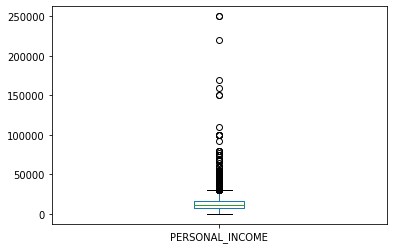

In [9]:
data['PERSONAL_INCOME'].plot(kind='box')

In [10]:
data = data[(data.PERSONAL_INCOME < np.percentile(data.PERSONAL_INCOME, 99))
            & (data.PERSONAL_INCOME > np.percentile(data.PERSONAL_INCOME, 1))]

In [11]:
data['WORK_TIME'].nlargest(20)

8984     2867959.0
4296       10000.0
2532        4320.0
5375        3500.0
9852        1500.0
1092        1312.0
11720       1254.0
13928       1120.0
9983         976.0
10677        864.0
10171        860.0
676          780.0
7711         730.0
3323         612.0
2983         600.0
8864         540.0
4122         528.0
9536         528.0
4571         519.0
1068         516.0
Name: WORK_TIME, dtype: float64

In [12]:
data.drop([8984, 4296, 2532, 5375, 9852, 1092, 11720, 13928, 9983, 10677, 10171, 676, 7711, 3323], inplace=True)

In [13]:
data['FST_PAYMENT'].nlargest()

4124     140000.0
14367     75606.0
4874      75570.0
4162      75500.0
11300     70940.0
Name: FST_PAYMENT, dtype: float64

In [14]:
data.loc[data['FST_PAYMENT'] > data['CREDIT']][['CREDIT', 'FST_PAYMENT']][:10]
len(data.loc[data['FST_PAYMENT'] > data['CREDIT']][['CREDIT', 'FST_PAYMENT']])

485

In [15]:
data = data.loc[data['FST_PAYMENT'] < data['CREDIT']]

In [16]:
#Nombre de mois dans le meme logement
data['FACT_LIVING_TERM'].nlargest(20)

6186     28101997
12261    16091983
8562        23916
14739        7200
988          6534
12869        6336
7650         3612
12134        3228
5681         3168
11004        2520
14707        1278
12232        1000
5369          980
1420          890
3789          720
5888          720
1937          708
4463          700
4705          696
1013          684
Name: FACT_LIVING_TERM, dtype: int64

In [17]:
data.drop([6186, 12261, 8562, 14739, 988, 12869, 7650, 12134, 5681, 11004, 14707], inplace=True)

In [18]:
data.shape, np.sum(data['TARGET'])

((14276, 38), 1720)

In [19]:
initial_data = data.copy()

## PERSONAL_INCOME

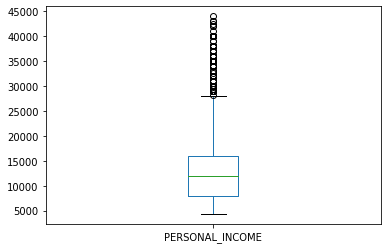

In [20]:
data['PERSONAL_INCOME'].plot(kind='box')

In [21]:
data['PERSONAL_INCOME'] = functions.split_best_iv(data, 'PERSONAL_INCOME', 'TARGET')

(0.0, 7600.0]         0.180513
(9300.0, 11000.0]     0.161600
(15300.0, 20800.0]    0.151863
(11000.0, 14800.0]    0.140866
(7600.0, 9300.0]      0.131690
(20800.0, 44000.0]    0.118941
(14800.0, 15300.0]    0.114528
Name: PERSONAL_INCOME, dtype: float64
IV:  0.09103655405256013


Counts:
PERSONAL_INCOME
(0.0, 7600.0]         2577
(7600.0, 9300.0]      1880
(9300.0, 11000.0]     2307
(11000.0, 14800.0]    2011
(14800.0, 15300.0]    1635
(15300.0, 20800.0]    2168
(20800.0, 44000.0]    1698
Name: TARGET, dtype: int64
Frequencies:
(0.0, 7600.0]         0.180513
(9300.0, 11000.0]     0.161600
(15300.0, 20800.0]    0.151863
(11000.0, 14800.0]    0.140866
(7600.0, 9300.0]      0.131690
(20800.0, 44000.0]    0.118941
(14800.0, 15300.0]    0.114528
Name: PERSONAL_INCOME, dtype: float64


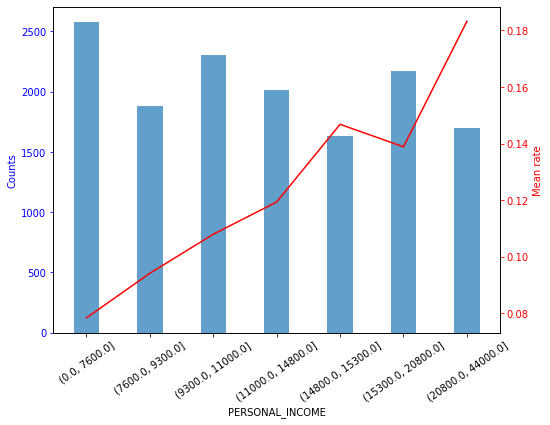

IV:  0.09103655405256013


,% responders,% non-responders,WOE,DG-DB,IV
"(11000.0, 14800.0]",0.139535,0.141048,-0.010786,-0.001513,0.000016
"(7600.0, 9300.0]",0.102907,0.135632,-0.276123,-0.032725,0.009036
"(20800.0, 44000.0]",0.180814,0.110465,0.492769,0.070349,0.034666
"(0.0, 7600.0]",0.117442,0.189153,-0.476611,-0.071711,0.034178
"(15300.0, 20800.0]",0.175000,0.148694,0.162896,0.026306,0.004285
"(9300.0, 11000.0]",0.144767,0.163906,-0.124163,-0.019138,0.002376
"(14800.0, 15300.0]",0.139535,0.111102,0.227864,0.028433,0.006479


In [22]:
functions.feature_stat(data, 'PERSONAL_INCOME', 'TARGET')
functions.calc_iv(data, 'TARGET', 'PERSONAL_INCOME')[0]

## Age

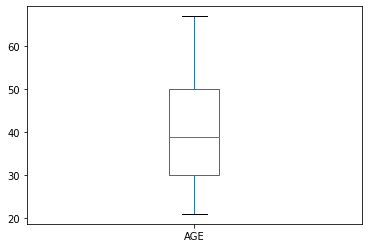

In [23]:
data['AGE'].plot(kind='box')

In [24]:
data['AGE'] = functions.split_best_iv(data, 'AGE', 'TARGET')

(42.0, 50.0]    0.180583
(54.0, 67.0]    0.146820
(0.0, 26.0]     0.135332
(30.0, 34.0]    0.119992
(26.0, 30.0]    0.118170
(34.0, 38.0]    0.108854
(38.0, 42.0]    0.101989
(50.0, 54.0]    0.088260
Name: AGE, dtype: float64
IV:  0.12362585788891757


Counts:
AGE
(0.0, 26.0]     1932
(26.0, 30.0]    1687
(30.0, 34.0]    1713
(34.0, 38.0]    1554
(38.0, 42.0]    1456
(42.0, 50.0]    2578
(50.0, 54.0]    1260
(54.0, 67.0]    2096
Name: TARGET, dtype: int64
Frequencies:
(42.0, 50.0]    0.180583
(54.0, 67.0]    0.146820
(0.0, 26.0]     0.135332
(30.0, 34.0]    0.119992
(26.0, 30.0]    0.118170
(34.0, 38.0]    0.108854
(38.0, 42.0]    0.101989
(50.0, 54.0]    0.088260
Name: AGE, dtype: float64


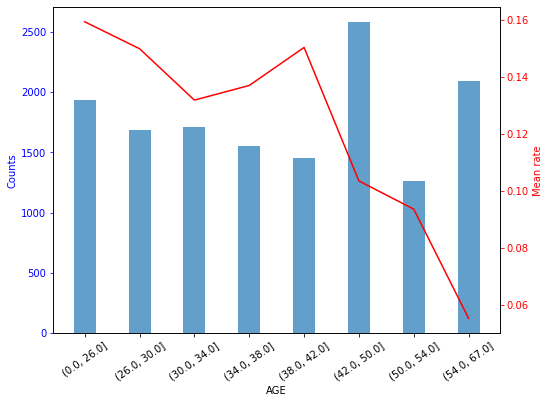

IV:  0.12362585788891757


,% responders,% non-responders,WOE,DG-DB,IV
"(30.0, 34.0]",0.131395,0.118429,0.103893,0.012966,0.001347
"(50.0, 54.0]",0.068605,0.090953,-0.281977,-0.022348,0.006302
"(38.0, 42.0]",0.127326,0.098519,0.256502,0.028807,0.007389
"(26.0, 30.0]",0.147093,0.114208,0.253041,0.032885,0.008321
"(42.0, 50.0]",0.155233,0.184055,-0.170313,-0.028823,0.004909
"(0.0, 26.0]",0.179070,0.129341,0.325327,0.049729,0.016178
"(54.0, 67.0]",0.067442,0.157694,-0.849388,-0.090252,0.076659
"(34.0, 38.0]",0.123837,0.106802,0.147996,0.017036,0.002521


In [25]:
functions.feature_stat(data, 'AGE', 'TARGET')
functions.calc_iv(data, 'TARGET', 'AGE')[0]

## WORK_TIME

In [26]:
#Nous allons considerer que les valeurs manquantes signifie que la personne n'as pas travaillé du tout.
data['WORK_TIME'].fillna(0, inplace=True)

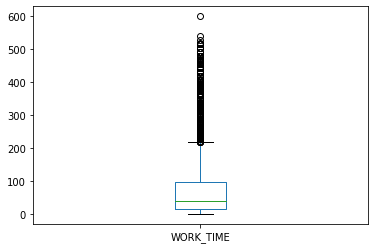

In [27]:
data['WORK_TIME'].plot(kind='box')

In [28]:
data['WORK_TIME'] = functions.split_best_iv(data, 'WORK_TIME', 'TARGET')
data['WORK_TIME'].fillna(data['WORK_TIME'].cat.categories[0], inplace=True)

(35.5, 53.5]      0.164122
(151.0, 600.0]    0.158238
(6.5, 21.5]       0.156276
(53.5, 85.5]      0.149902
(85.5, 151.0]     0.119011
(21.5, 35.5]      0.109344
NaN               0.086579
(0.0, 6.5]        0.056528
Name: WORK_TIME, dtype: float64
IV:  0.07588739512498476


Counts:
WORK_TIME
(0.0, 6.5]        2043
(6.5, 21.5]       2231
(21.5, 35.5]      1561
(35.5, 53.5]      2343
(53.5, 85.5]      2140
(85.5, 151.0]     1699
(151.0, 600.0]    2259
Name: TARGET, dtype: int64
Frequencies:
(35.5, 53.5]      0.164122
(151.0, 600.0]    0.158238
(6.5, 21.5]       0.156276
(53.5, 85.5]      0.149902
(0.0, 6.5]        0.143107
(85.5, 151.0]     0.119011
(21.5, 35.5]      0.109344
Name: WORK_TIME, dtype: float64


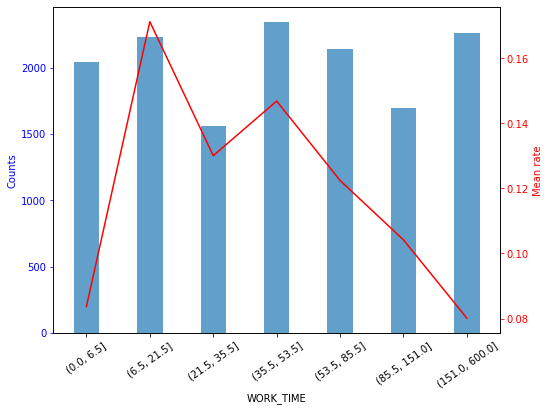

IV:  0.09138088986493594


,% responders,% non-responders,WOE,DG-DB,IV
"(85.5, 151.0]",0.102907,0.121217,-0.163756,-0.018310,0.002998
"(53.5, 85.5]",0.152326,0.149570,0.018256,0.002756,0.000050
"(151.0, 600.0]",0.105233,0.165499,-0.452790,-0.060266,0.027288
"(35.5, 53.5]",0.200000,0.159207,0.228114,0.040793,0.009305
"(0.0, 6.5]",0.099419,0.149092,-0.405225,-0.049673,0.020129
"(21.5, 35.5]",0.118023,0.108155,0.087312,0.009868,0.000862
"(6.5, 21.5]",0.222093,0.147260,0.410895,0.074833,0.030748


In [29]:
functions.feature_stat(data, 'WORK_TIME', 'TARGET')
functions.calc_iv(data, 'TARGET', 'WORK_TIME')[0]

## CREDIT

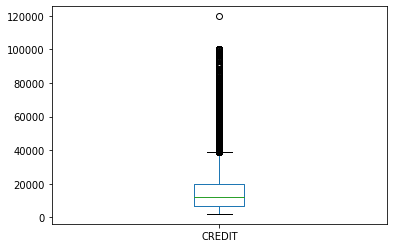

In [30]:
data['CREDIT'].plot(kind='box')


In [31]:
data['CREDIT'] = functions.split_best_iv(data, 'CREDIT', 'TARGET')

(9400.0, 14100.0]      0.200897
(22500.0, 119700.0]    0.175960
(0.0, 5400.0]          0.169585
(14100.0, 18100.0]     0.127487
(5400.0, 7200.0]       0.116629
(18100.0, 22500.0]     0.110325
(7200.0, 9400.0]       0.099117
Name: CREDIT, dtype: float64
IV:  0.015512990338530862


Counts:
CREDIT
(0.0, 5400.0]          2421
(5400.0, 7200.0]       1665
(7200.0, 9400.0]       1415
(9400.0, 14100.0]      2868
(14100.0, 18100.0]     1820
(18100.0, 22500.0]     1575
(22500.0, 119700.0]    2512
Name: TARGET, dtype: int64
Frequencies:
(9400.0, 14100.0]      0.200897
(22500.0, 119700.0]    0.175960
(0.0, 5400.0]          0.169585
(14100.0, 18100.0]     0.127487
(5400.0, 7200.0]       0.116629
(18100.0, 22500.0]     0.110325
(7200.0, 9400.0]       0.099117
Name: CREDIT, dtype: float64


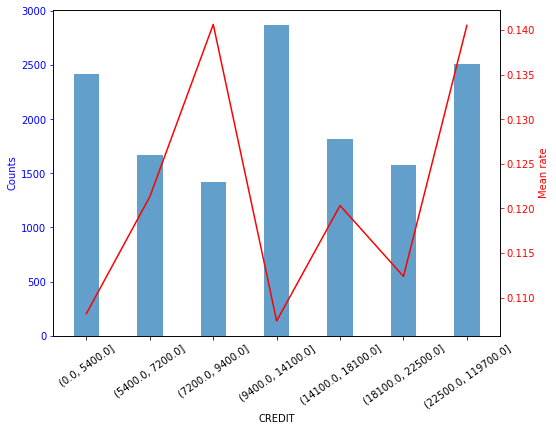

IV:  0.015512990338530862


,% responders,% non-responders,WOE,DG-DB,IV
"(18100.0, 22500.0]",0.102907,0.111341,-0.078774,-0.008434,6.643955e-04
"(22500.0, 119700.0]",0.205233,0.171950,0.176942,0.033283,5.889141e-03
"(7200.0, 9400.0]",0.115698,0.096846,0.177857,0.018852,3.352881e-03
"(14100.0, 18100.0]",0.127326,0.127509,-0.001438,-0.000183,2.633451e-07
"(0.0, 5400.0]",0.152326,0.171950,-0.121182,-0.019624,2.378077e-03
"(9400.0, 14100.0]",0.179070,0.203887,-0.129788,-0.024817,3.220936e-03
"(5400.0, 7200.0]",0.117442,0.116518,0.007898,0.000924,7.296327e-06


In [32]:
functions.feature_stat(data, 'CREDIT', 'TARGET')
functions.calc_iv(data, 'TARGET', 'CREDIT')[0]

## TERM

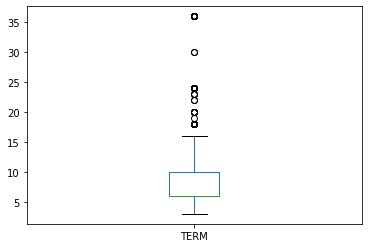

In [33]:
data['TERM'].plot(kind='box')

In [34]:
data['TERM'] = functions.split_best_iv(data, 'TERM', 'TARGET')

(4.5, 8.5]      0.410759
(11.5, 36.0]    0.241454
(8.5, 11.5]     0.209793
(0.0, 4.5]      0.137994
Name: TERM, dtype: float64
IV:  0.03210038261604432


Counts:
TERM
(0.0, 4.5]      1970
(4.5, 8.5]      5864
(8.5, 11.5]     2995
(11.5, 36.0]    3447
Name: TARGET, dtype: int64
Frequencies:
(4.5, 8.5]      0.410759
(11.5, 36.0]    0.241454
(8.5, 11.5]     0.209793
(0.0, 4.5]      0.137994
Name: TERM, dtype: float64


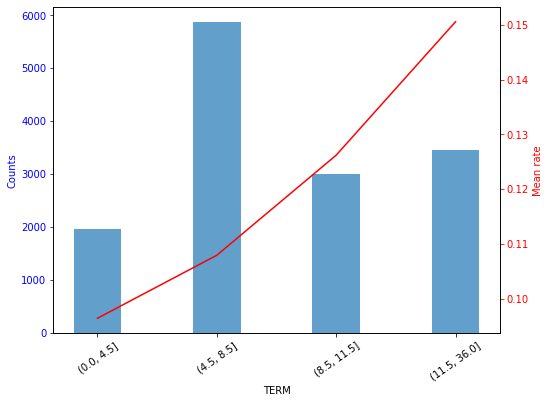

IV:  0.03210038261604432


,% responders,% non-responders,WOE,DG-DB,IV
"(4.5, 8.5]",0.368023,0.416614,-0.124013,-0.048590,0.006026
"(11.5, 36.0]",0.301744,0.233195,0.257703,0.068549,0.017665
"(8.5, 11.5]",0.219767,0.208426,0.052985,0.011341,0.000601
"(0.0, 4.5]",0.110465,0.141765,-0.249470,-0.031300,0.007808


In [35]:
functions.feature_stat(data, 'TERM', 'TARGET')
functions.calc_iv(data, 'TARGET', 'TERM')[0]

## FST_PAYMENT

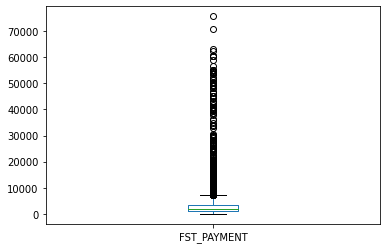

In [36]:
data['FST_PAYMENT'].plot(kind='box')

In [37]:
data['FST_PAYMENT'] = functions.split_best_iv(data, 'FST_PAYMENT', 'TARGET')
data['FST_PAYMENT'].fillna(data['FST_PAYMENT'].cat.categories[0], inplace=True)

(2100.0, 3800.0]     0.195853
(200.0, 900.0]       0.145139
(3800.0, 6000.0]     0.134071
(900.0, 1200.0]      0.118801
(1700.0, 2100.0]     0.115158
(1200.0, 1700.0]     0.105492
(6000.0, 75600.0]    0.099958
NaN                  0.082726
(0.0, 200.0]         0.002802
Name: FST_PAYMENT, dtype: float64
IV:  0.02564207402895532


Counts:
FST_PAYMENT
(0.0, 200.0]         1221
(200.0, 900.0]       2072
(900.0, 1200.0]      1696
(1200.0, 1700.0]     1506
(1700.0, 2100.0]     1644
(2100.0, 3800.0]     2796
(3800.0, 6000.0]     1914
(6000.0, 75600.0]    1427
Name: TARGET, dtype: int64
Frequencies:
(2100.0, 3800.0]     0.195853
(200.0, 900.0]       0.145139
(3800.0, 6000.0]     0.134071
(900.0, 1200.0]      0.118801
(1700.0, 2100.0]     0.115158
(1200.0, 1700.0]     0.105492
(6000.0, 75600.0]    0.099958
(0.0, 200.0]         0.085528
Name: FST_PAYMENT, dtype: float64


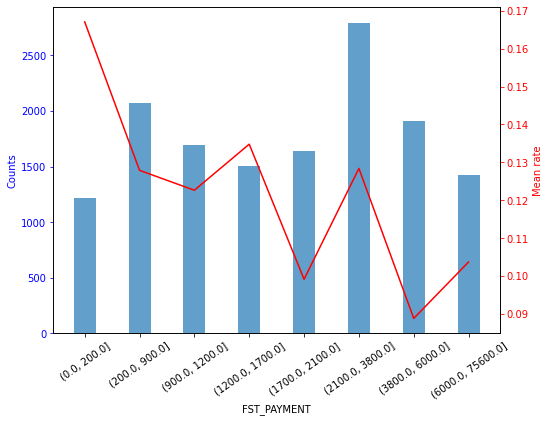

IV:  0.039354549525979804


,% responders,% non-responders,WOE,DG-DB,IV
"(3800.0, 6000.0]",0.098837,0.138898,-0.340264,-0.040061,0.013631
"(2100.0, 3800.0]",0.208721,0.194090,0.072674,0.014630,0.001063
"(200.0, 900.0]",0.154070,0.143915,0.068181,0.010155,0.000692
"(6000.0, 75600.0]",0.086047,0.101864,-0.168747,-0.015817,0.002669
"(900.0, 1200.0]",0.120930,0.118509,0.020224,0.002421,0.000049
"(1200.0, 1700.0]",0.118023,0.103775,0.128656,0.014248,0.001833
"(1700.0, 2100.0]",0.094767,0.117952,-0.218848,-0.023184,0.005074
"(0.0, 200.0]",0.118605,0.080997,0.381382,0.037608,0.014343


In [38]:
functions.feature_stat(data, 'FST_PAYMENT', 'TARGET')
functions.calc_iv(data, 'TARGET', 'FST_PAYMENT')[0]

## FACT_LIVING_TERM

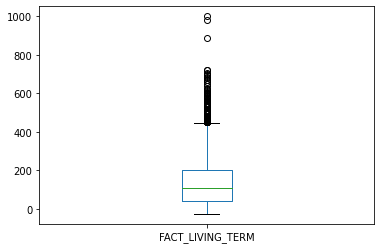

In [39]:
data['FACT_LIVING_TERM'].plot(kind='box')

In [40]:
data['FACT_LIVING_TERM'] = functions.split_best_iv(data, 'FACT_LIVING_TERM', 'TARGET')
data['FACT_LIVING_TERM'].fillna(data['FACT_LIVING_TERM'].cat.categories[0], inplace=True)

(38.5, 85.5]       0.188218
(238.5, 1000.0]    0.187237
(85.5, 131.5]      0.157677
(0.0, 18.5]        0.122373
(18.5, 38.5]       0.122233
(171.5, 238.5]     0.119081
(131.5, 171.5]     0.101919
NaN                0.001261
Name: FACT_LIVING_TERM, dtype: float64
IV:  0.05084877695243425


Counts:
FACT_LIVING_TERM
(0.0, 18.5]        1765
(18.5, 38.5]       1745
(38.5, 85.5]       2687
(85.5, 131.5]      2251
(131.5, 171.5]     1455
(171.5, 238.5]     1700
(238.5, 1000.0]    2673
Name: TARGET, dtype: int64
Frequencies:
(38.5, 85.5]       0.188218
(238.5, 1000.0]    0.187237
(85.5, 131.5]      0.157677
(0.0, 18.5]        0.123634
(18.5, 38.5]       0.122233
(171.5, 238.5]     0.119081
(131.5, 171.5]     0.101919
Name: FACT_LIVING_TERM, dtype: float64


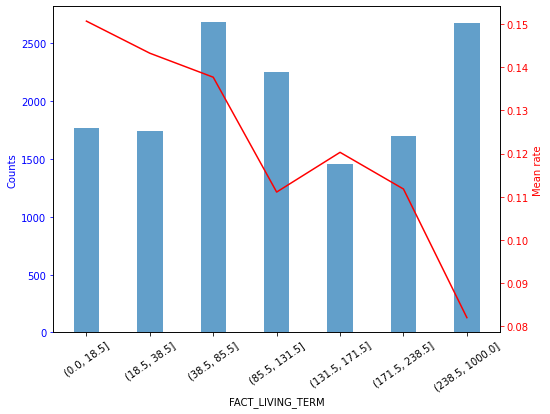

IV:  0.05037352458565327


,% responders,% non-responders,WOE,DG-DB,IV
"(131.5, 171.5]",0.101744,0.101943,-0.001955,-0.000199,3.892631e-07
"(238.5, 1000.0]",0.127326,0.195444,-0.428529,-0.068119,2.919086e-02
"(18.5, 38.5]",0.145349,0.119067,0.199454,0.026282,5.242095e-03
"(38.5, 85.5]",0.215116,0.184533,0.153349,0.030583,4.689865e-03
"(85.5, 131.5]",0.145349,0.159366,-0.092067,-0.014017,1.290523e-03
"(171.5, 238.5]",0.110465,0.120261,-0.084967,-0.009796,8.323416e-04
"(0.0, 18.5]",0.154651,0.119385,0.258817,0.035266,9.127448e-03


In [41]:
functions.feature_stat(data, 'FACT_LIVING_TERM', 'TARGET')
functions.calc_iv(data, 'TARGET', 'FACT_LIVING_TERM')[0]

## LOAN_NUM_PAYM

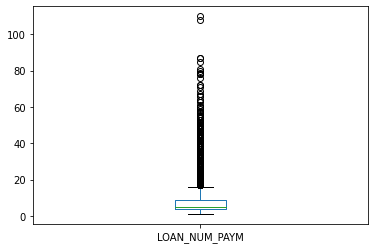

In [42]:
data['LOAN_NUM_PAYM'].plot(kind='box')

In [43]:
data['LOAN_NUM_PAYM'] = functions.split_best_iv(data, 'LOAN_NUM_PAYM', 'TARGET')

(3.5, 4.5]       0.264290
(11.5, 110.0]    0.191580
(4.5, 5.5]       0.154245
(0.0, 3.5]       0.150252
(5.5, 6.5]       0.134351
(6.5, 11.5]      0.105282
Name: LOAN_NUM_PAYM, dtype: float64
IV:  0.029504153019292934


Counts:
LOAN_NUM_PAYM
(0.0, 3.5]       2145
(3.5, 4.5]       3773
(4.5, 5.5]       2202
(5.5, 6.5]       1918
(6.5, 11.5]      1503
(11.5, 110.0]    2735
Name: TARGET, dtype: int64
Frequencies:
(3.5, 4.5]       0.264290
(11.5, 110.0]    0.191580
(4.5, 5.5]       0.154245
(0.0, 3.5]       0.150252
(5.5, 6.5]       0.134351
(6.5, 11.5]      0.105282
Name: LOAN_NUM_PAYM, dtype: float64


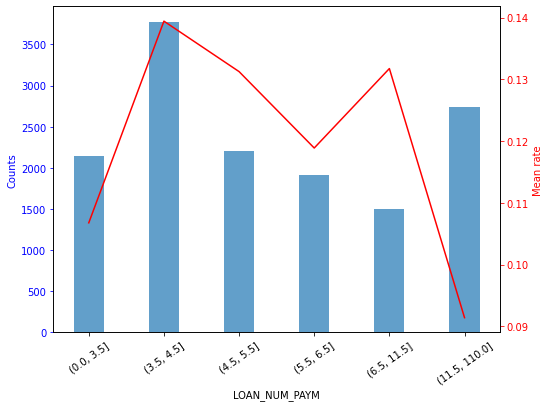

IV:  0.029504153019292934


,% responders,% non-responders,WOE,DG-DB,IV
"(5.5, 6.5]",0.132558,0.134597,-0.015264,-0.002039,0.000031
"(6.5, 11.5]",0.115116,0.103934,0.102183,0.011182,0.001143
"(11.5, 110.0]",0.145349,0.197913,-0.308693,-0.052565,0.016226
"(0.0, 3.5]",0.133140,0.152596,-0.136399,-0.019457,0.002654
"(3.5, 4.5]",0.305814,0.258601,0.167689,0.047212,0.007917
"(4.5, 5.5]",0.168023,0.152357,0.097873,0.015666,0.001533


In [44]:
functions.feature_stat(data, 'LOAN_NUM_PAYM', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_NUM_PAYM')[0]

## LOAN_AVG_DLQ_AMT

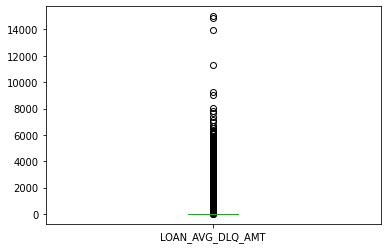

In [45]:
data['LOAN_AVG_DLQ_AMT'].plot(kind='box')

In [46]:
data['LOAN_AVG_DLQ_AMT'] = functions.split_best_iv(data, 'LOAN_AVG_DLQ_AMT', 'TARGET')
data['LOAN_AVG_DLQ_AMT'].fillna(data['LOAN_AVG_DLQ_AMT'].cat.categories[0], inplace=True)

NaN                 0.871603
(500.0, 15000.0]    0.123074
(0.0, 500.0]        0.005324
Name: LOAN_AVG_DLQ_AMT, dtype: float64
IV:  0.04379674918020014


Counts:
LOAN_AVG_DLQ_AMT
(0.0, 500.0]        12519
(500.0, 15000.0]     1757
Name: TARGET, dtype: int64
Frequencies:
(0.0, 500.0]        0.876926
(500.0, 15000.0]    0.123074
Name: LOAN_AVG_DLQ_AMT, dtype: float64


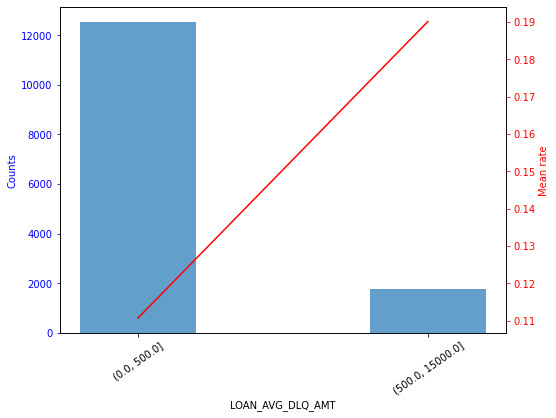

IV:  0.051270200650817575


,% responders,% non-responders,WOE,DG-DB,IV
"(500.0, 15000.0]",0.194186,0.113332,0.538493,0.080854,0.043539
"(0.0, 500.0]",0.805814,0.886668,-0.095617,-0.080854,0.007731


In [47]:
functions.feature_stat(data, 'LOAN_AVG_DLQ_AMT', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_AVG_DLQ_AMT')[0]

## LOAN_MAX_DLQ_AMT

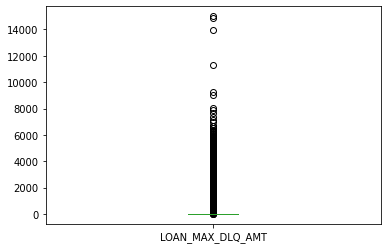

In [48]:
data['LOAN_MAX_DLQ_AMT'].plot(kind='box')

In [49]:
data['LOAN_MAX_DLQ_AMT'] = functions.split_best_iv(data, 'LOAN_MAX_DLQ_AMT', 'TARGET')
data['LOAN_MAX_DLQ_AMT'].fillna(data['LOAN_MAX_DLQ_AMT'].cat.categories[0], inplace=True)

NaN                 0.871603
(500.0, 15000.0]    0.123354
(0.0, 500.0]        0.005043
Name: LOAN_MAX_DLQ_AMT, dtype: float64
IV:  0.0435641041625501


Counts:
LOAN_MAX_DLQ_AMT
(0.0, 500.0]        12515
(500.0, 15000.0]     1761
Name: TARGET, dtype: int64
Frequencies:
(0.0, 500.0]        0.876646
(500.0, 15000.0]    0.123354
Name: LOAN_MAX_DLQ_AMT, dtype: float64


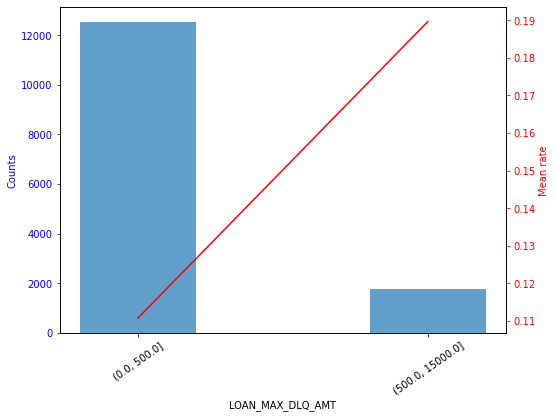

IV:  0.050813185660810986


,% responders,% non-responders,WOE,DG-DB,IV
"(500.0, 15000.0]",0.194186,0.113651,0.535686,0.080535,0.043142
"(0.0, 500.0]",0.805814,0.886349,-0.095258,-0.080535,0.007672


In [50]:
functions.feature_stat(data, 'LOAN_MAX_DLQ_AMT', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_MAX_DLQ_AMT')[0]

## Income_to_limit

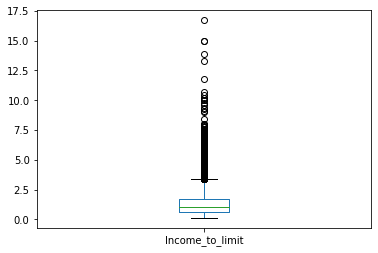

In [51]:
data['Income_to_limit'].plot(kind='box')

In [52]:
data['Income_to_limit'] = functions.split_best_iv(data, 'Income_to_limit', 'TARGET')

(0.515, 0.783]     0.189619
(0.783, 1.108]     0.181704
(0.0, 0.515]       0.174629
(1.428, 1.962]     0.129728
(1.108, 1.428]     0.121393
(2.556, 16.706]    0.114388
(1.962, 2.556]     0.088540
Name: Income_to_limit, dtype: float64
IV:  0.031780416933268094


Counts:
Income_to_limit
(0.0, 0.515]       2493
(0.515, 0.783]     2707
(0.783, 1.108]     2594
(1.108, 1.428]     1733
(1.428, 1.962]     1852
(1.962, 2.556]     1264
(2.556, 16.706]    1633
Name: TARGET, dtype: int64
Frequencies:
(0.515, 0.783]     0.189619
(0.783, 1.108]     0.181704
(0.0, 0.515]       0.174629
(1.428, 1.962]     0.129728
(1.108, 1.428]     0.121393
(2.556, 16.706]    0.114388
(1.962, 2.556]     0.088540
Name: Income_to_limit, dtype: float64


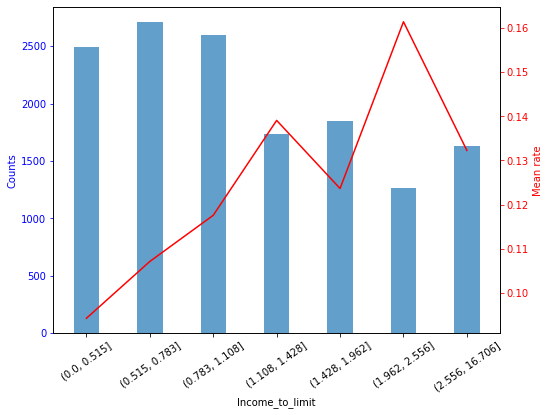

IV:  0.031780416933268094


,% responders,% non-responders,WOE,DG-DB,IV
"(0.515, 0.783]",0.168605,0.192498,-0.132527,-0.023893,0.003166
"(0.0, 0.515]",0.136628,0.179834,-0.274775,-0.043206,0.011872
"(2.556, 16.706]",0.125581,0.112854,0.106856,0.012727,0.001360
"(1.428, 1.962]",0.133140,0.129261,0.029565,0.003879,0.000115
"(1.962, 2.556]",0.118605,0.084422,0.339970,0.034183,0.011621
"(1.108, 1.428]",0.140116,0.118828,0.164799,0.021289,0.003508
"(0.783, 1.108]",0.177326,0.182303,-0.027684,-0.004978,0.000138


In [53]:
functions.feature_stat(data, 'Income_to_limit', 'TARGET')
functions.calc_iv(data, 'TARGET', 'Income_to_limit')[0]

# Categorical

In [54]:
for col in ['GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'OWN_AUTO',
            'FAMILY_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ']:
    data[col] = data[col].astype('category')
    if (data[col].isnull() == True).any():
        data[col].cat.add_categories(['Unknown'], inplace=True)
        data[col].fillna('Unknown', inplace=True)

### OWN_AUTO

In [55]:
data['OWN_AUTO'].value_counts(dropna=False, normalize=True)

0    0.885262
1    0.114668
2    0.000070
Name: OWN_AUTO, dtype: float64

In [56]:
data.loc[data['OWN_AUTO'] == 2, 'OWN_AUTO'] = 1
data['OWN_AUTO'] = data['OWN_AUTO'].cat.remove_unused_categories()

Counts:
OWN_AUTO
0    12638
1     1638
Name: TARGET, dtype: int64
Frequencies:
0    0.885262
1    0.114738
Name: OWN_AUTO, dtype: float64


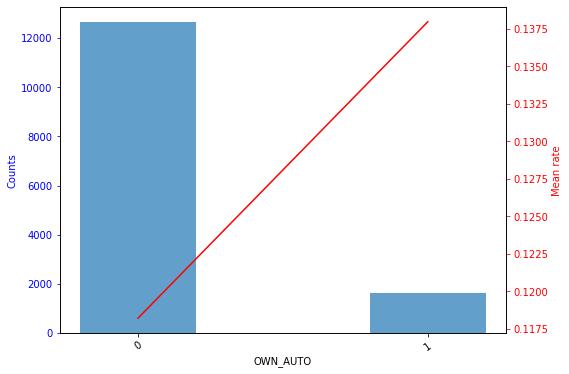

IV:  0.003356334710772968


,% responders,% non-responders,WOE,DG-DB,IV
0,0.868605,0.887544,-0.021570,-0.018939,0.000409
1,0.131395,0.112456,0.155647,0.018939,0.002948


In [57]:
functions.feature_stat(data, 'OWN_AUTO', 'TARGET')
functions.calc_iv(data, 'TARGET', 'OWN_AUTO')[0]

### GENDER

Counts:
GENDER
0    4936
1    9340
Name: TARGET, dtype: int64
Frequencies:
1    0.654245
0    0.345755
Name: GENDER, dtype: float64


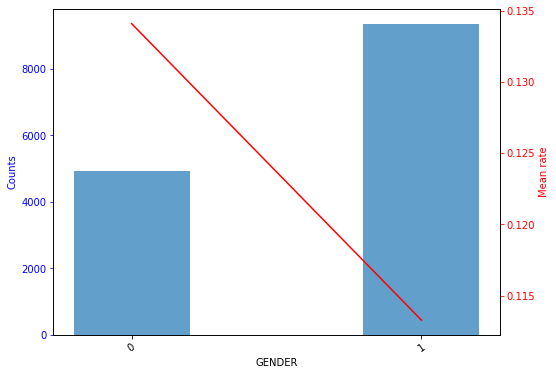

IV:  0.008571381188026393


,% responders,% non-responders,WOE,DG-DB,IV
1,0.615116,0.659605,-0.069830,-0.044489,0.003107
0,0.384884,0.340395,0.122834,0.044489,0.005465


In [58]:
functions.feature_stat(data, 'GENDER', 'TARGET')
functions.calc_iv(data, 'TARGET', 'GENDER')[0]

### CHILD_TOTAL

In [59]:
data['CHILD_TOTAL'].value_counts(dropna=False, normalize=True)

1     0.333217
0     0.327473
2     0.272065
3     0.053026
4     0.008826
5     0.003993
6     0.000841
7     0.000350
10    0.000140
8     0.000070
Name: CHILD_TOTAL, dtype: float64

In [60]:
data['CHILD_TOTAL'].cat.add_categories(['3 or more'], inplace=True)
data.loc[data['CHILD_TOTAL'].isin([1.0, 0.0, 2.0]) == False, 'CHILD_TOTAL'] = '3 or more'
data['CHILD_TOTAL'] = data['CHILD_TOTAL'].cat.remove_unused_categories()

Counts:
CHILD_TOTAL
0            4675
1            4757
2            3884
3 or more     960
Name: TARGET, dtype: int64
Frequencies:
1            0.333217
0            0.327473
2            0.272065
3 or more    0.067246
Name: CHILD_TOTAL, dtype: float64


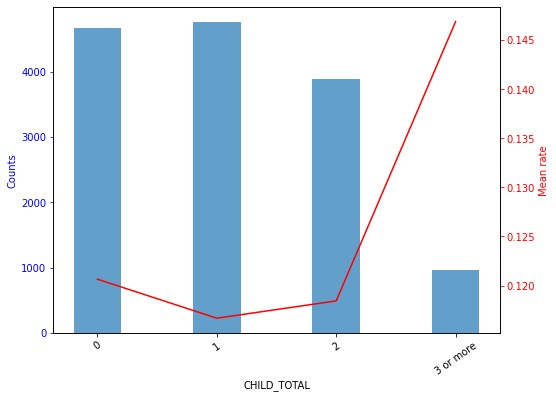

IV:  0.004368215038128054


,% responders,% non-responders,WOE,DG-DB,IV
3 or more,0.081977,0.065228,0.228550,0.016749,3.827978e-03
1,0.322674,0.334661,-0.036473,-0.011986,4.371814e-04
0,0.327907,0.327413,0.001507,0.000494,7.441446e-07
2,0.267442,0.272698,-0.019464,-0.005256,1.023110e-04


In [61]:
functions.feature_stat(data, 'CHILD_TOTAL', 'TARGET')
functions.calc_iv(data, 'TARGET', 'CHILD_TOTAL')[0]

### DEPENDANTS

In [62]:
data['DEPENDANTS'].value_counts(dropna=False, normalize=True)

0    0.538386
1    0.297772
2    0.144088
3    0.016251
4    0.002802
5    0.000350
6    0.000280
7    0.000070
Name: DEPENDANTS, dtype: float64

In [63]:
data['DEPENDANTS'].cat.add_categories(['2 or more'], inplace=True)
data.loc[data['DEPENDANTS'].isin([1.0, 2.0]) == False, 'DEPENDANTS'] = '2 or more'
data['DEPENDANTS'] = data['DEPENDANTS'].cat.remove_unused_categories()

Counts:
DEPENDANTS
1            4251
2            2057
2 or more    7968
Name: TARGET, dtype: int64
Frequencies:
2 or more    0.558140
1            0.297772
2            0.144088
Name: DEPENDANTS, dtype: float64


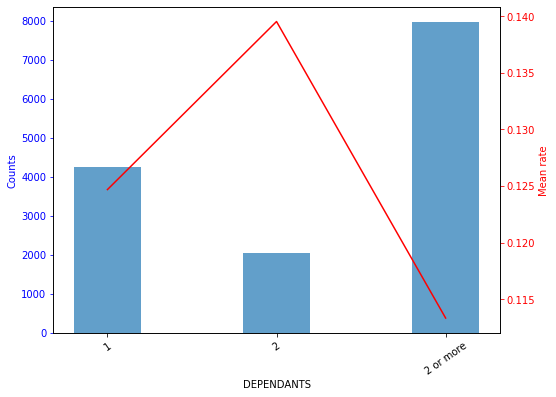

IV:  0.00743729564542183


,% responders,% non-responders,WOE,DG-DB,IV
2 or more,0.52500,0.562679,-0.069311,-0.037679,0.002612
1,0.30814,0.296352,0.039004,0.011787,0.000460
2,0.16686,0.140968,0.168622,0.025892,0.004366


In [64]:
functions.feature_stat(data, 'DEPENDANTS', 'TARGET')
functions.calc_iv(data, 'TARGET', 'DEPENDANTS')[0]

### EDUCATION

In [65]:
data['EDUCATION'].value_counts(dropna=False, normalize=True)

Professional School     0.432544
Some High School        0.308700
Undergraduate Degree    0.200406
No Formal Education     0.034744
Some Primary School     0.022345
Post-Graduate Work      0.001191
Graduate Degree         0.000070
Name: EDUCATION, dtype: float64

In [66]:
data.loc[data['EDUCATION'].isin(['Undergraduate Degree', 'Post-Graduate Work', 'Graduate Degree']),
         'EDUCATION'] = 'Undergraduate Degree'
data.loc[data['EDUCATION'].isin(['Some High School', 'No Formal Education', 'Some Primary School']),
         'EDUCATION'] = 'Some High School'
data['EDUCATION'] = data['EDUCATION'].cat.remove_unused_categories()

Counts:
EDUCATION
Professional School     6175
Some High School        5222
Undergraduate Degree    2879
Name: TARGET, dtype: int64
Frequencies:
Professional School     0.432544
Some High School        0.365789
Undergraduate Degree    0.201667
Name: EDUCATION, dtype: float64


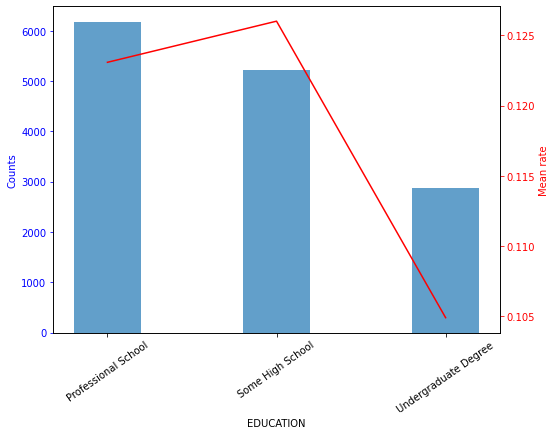

IV:  0.005860986838814946


,% responders,% non-responders,WOE,DG-DB,IV
Some High School,0.382558,0.363492,0.051125,0.019067,0.000975
Undergraduate Degree,0.175581,0.205241,-0.156080,-0.029659,0.004629
Professional School,0.441860,0.431268,0.024265,0.010593,0.000257


In [67]:
functions.feature_stat(data, 'EDUCATION', 'TARGET')
functions.calc_iv(data, 'TARGET', 'EDUCATION')[0]

### MARITAL_STATUS

In [68]:
data['MARITAL_STATUS'].value_counts(dropna=False, normalize=True)

Married      0.617750
Single       0.238652
Separated    0.081816
Widowed      0.038806
Partner      0.022976
Name: MARITAL_STATUS, dtype: float64

In [69]:
data.loc[data['MARITAL_STATUS'].isin(['Married', 'Partner']), 'MARITAL_STATUS'] = 'Married'
data.loc[data['MARITAL_STATUS'].isin(['Single', 'Separated', 'Widowed']), 'MARITAL_STATUS'] = 'Single'
data['MARITAL_STATUS'] = data['MARITAL_STATUS'].cat.remove_unused_categories()

Counts:
MARITAL_STATUS
Married    9147
Single     5129
Name: TARGET, dtype: int64
Frequencies:
Married    0.640726
Single     0.359274
Name: MARITAL_STATUS, dtype: float64


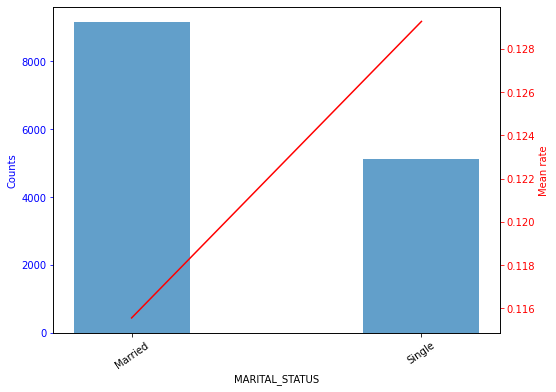

IV:  0.003803339088711162


,% responders,% non-responders,WOE,DG-DB,IV
Married,0.614535,0.644313,-0.047320,-0.029779,0.001409
Single,0.385465,0.355687,0.080401,0.029779,0.002394


In [70]:
functions.feature_stat(data, 'MARITAL_STATUS', 'TARGET')
functions.calc_iv(data, 'TARGET', 'MARITAL_STATUS')[0]

### GEN_INDUSTRY

In [71]:
data['GEN_INDUSTRY'].value_counts(dropna=False, normalize=True)

Market, real estate               0.157957
Others fields                     0.113477
Iron & Steel                      0.089451
Unknown                           0.086579
Public  & municipal administ.     0.084477
Healthcare                        0.077683
Schools                           0.064164
Transportation                    0.051695
Agriculture                       0.046372
Construction - Raw Materials      0.037896
Municipal economy/Road service    0.035724
Restaurant & Catering             0.027249
Scientific & Technical Instr.     0.026898
Oil & Gas Operations              0.014780
Assembly production               0.011418
Regional Banks                    0.010857
Recreational Activities           0.009526
Detective                         0.009316
Oil Well Services & Equipment     0.009316
Information service               0.006795
Beauty shop                       0.006514
Software & Programming            0.005534
Chemistry/Perfumery/Pharmaceut    0.004273
Mass media 

In [72]:
data['GEN_INDUSTRY'].cat.add_categories(['others'], inplace=True)
data.loc[data['GEN_INDUSTRY'].isin(['Market, real estate', 'Others fields', 'Iron & Steel', 'Unknown', 'Transportation',
                                   'Public  & municipal administ.', 'Healthcare', 'Schools']) == False,
         'GEN_INDUSTRY'] = 'others'
data['GEN_INDUSTRY'] = data['GEN_INDUSTRY'].cat.remove_unused_categories()

Counts:
GEN_INDUSTRY
Healthcare                       1109
Iron & Steel                     1277
Market, real estate              2255
Others fields                    1620
Public  & municipal administ.    1206
Schools                           916
Transportation                    738
Unknown                          1236
others                           3919
Name: TARGET, dtype: int64
Frequencies:
others                           0.274517
Market, real estate              0.157957
Others fields                    0.113477
Iron & Steel                     0.089451
Unknown                          0.086579
Public  & municipal administ.    0.084477
Healthcare                       0.077683
Schools                          0.064164
Transportation                   0.051695
Name: GEN_INDUSTRY, dtype: float64


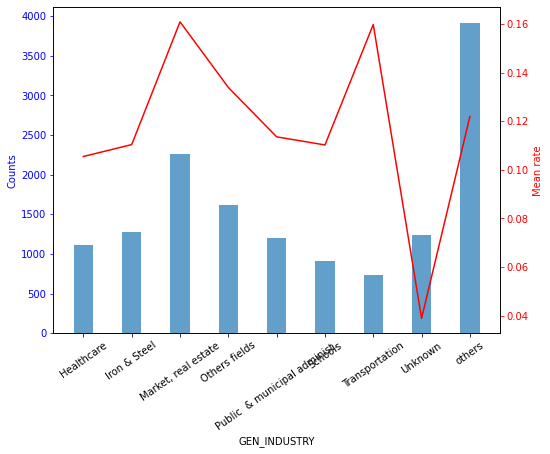

IV:  0.11337843061344759


,% responders,% non-responders,WOE,DG-DB,IV
"Market, real estate",0.211047,0.150685,0.336887,0.060362,0.020335
others,0.277907,0.274052,0.013968,0.003855,0.000054
Schools,0.058721,0.064909,-0.100193,-0.006188,0.000620
Public & municipal administ.,0.079651,0.085139,-0.066624,-0.005487,0.000366
Others fields,0.126163,0.111739,0.121404,0.014423,0.001751
Iron & Steel,0.081977,0.090475,-0.098634,-0.008498,0.000838
Unknown,0.027907,0.094616,-1.220951,-0.066709,0.081449
Transportation,0.068605,0.049379,0.328839,0.019226,0.006322
Healthcare,0.068023,0.079006,-0.149675,-0.010983,0.001644


In [73]:
functions.feature_stat(data, 'GEN_INDUSTRY', 'TARGET')
functions.calc_iv(data, 'TARGET', 'GEN_INDUSTRY')[0]

### FAMILY_INCOME

In [74]:
data['FAMILY_INCOME'].value_counts(dropna=False, normalize=True)

10000-20000    0.471070
20000-50000    0.405015
5000-10000     0.096526
50000+         0.025077
up to 5000     0.002312
Name: FAMILY_INCOME, dtype: float64

In [75]:
data['FAMILY_INCOME'].cat.add_categories(['up to 10000', '20000+'], inplace=True)
data.loc[data['FAMILY_INCOME'].isin(['up to 5000', '5000-10000']), 'FAMILY_INCOME'] = 'up to 10000'
data.loc[data['FAMILY_INCOME'].isin(['20000-50000', '50000+']), 'FAMILY_INCOME'] = '20000+'
data['FAMILY_INCOME'] = data['FAMILY_INCOME'].cat.remove_unused_categories()

Counts:
FAMILY_INCOME
10000-20000    6725
up to 10000    1411
20000+         6140
Name: TARGET, dtype: int64
Frequencies:
10000-20000    0.471070
20000+         0.430092
up to 10000    0.098837
Name: FAMILY_INCOME, dtype: float64


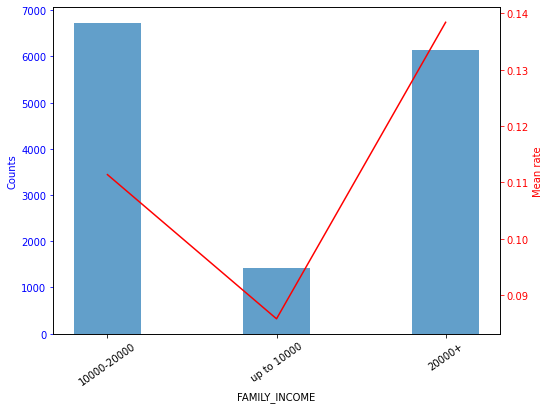

IV:  0.027492161176787232


,% responders,% non-responders,WOE,DG-DB,IV
10000-20000,0.435465,0.475948,-0.088893,-0.040483,0.003599
20000+,0.494186,0.421313,0.159537,0.072874,0.011626
up to 10000,0.070349,0.102740,-0.378733,-0.032391,0.012267


In [76]:
functions.feature_stat(data, 'FAMILY_INCOME', 'TARGET')
functions.calc_iv(data, 'TARGET', 'FAMILY_INCOME')[0]

### LOAN_NUM_TOTAL

In [77]:
data['LOAN_NUM_TOTAL'].value_counts(dropna=False, normalize=True)

1     0.738232
2     0.174489
3     0.058350
4     0.018282
5     0.007005
6     0.002452
7     0.000981
8     0.000140
11    0.000070
Name: LOAN_NUM_TOTAL, dtype: float64

In [78]:
data['LOAN_NUM_TOTAL'].cat.add_categories(['3 or more'], inplace=True)
data.loc[data['LOAN_NUM_TOTAL'].isin([1, 2]) == False, 'LOAN_NUM_TOTAL'] = '3 or more'
data['LOAN_NUM_TOTAL'] = data['LOAN_NUM_TOTAL'].cat.remove_unused_categories()

Counts:
LOAN_NUM_TOTAL
1            10539
2             2491
3 or more     1246
Name: TARGET, dtype: int64
Frequencies:
1            0.738232
2            0.174489
3 or more    0.087279
Name: LOAN_NUM_TOTAL, dtype: float64


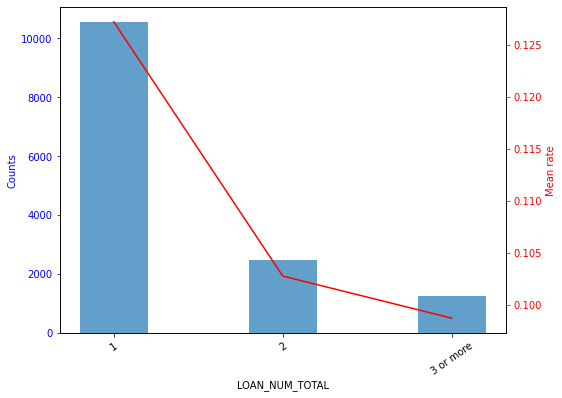

IV:  0.012163488944149179


,% responders,% non-responders,WOE,DG-DB,IV
1,0.779651,0.732558,0.062304,0.047093,0.002934
2,0.148837,0.178003,-0.178945,-0.029165,0.005219
3 or more,0.071512,0.089439,-0.223700,-0.017928,0.004010


In [79]:
functions.feature_stat(data, 'LOAN_NUM_TOTAL', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_NUM_TOTAL')[0]

### LOAN_NUM_TOTAL

In [80]:
data['LOAN_NUM_CLOSED'].value_counts(dropna=False, normalize=True)

0     0.522275
1     0.302045
2     0.115999
3     0.039857
4     0.013379
5     0.004133
6     0.001821
7     0.000280
8     0.000140
11    0.000070
Name: LOAN_NUM_CLOSED, dtype: float64

In [81]:
data['LOAN_NUM_CLOSED'].cat.add_categories(['3 or more'], inplace=True)
data.loc[data['LOAN_NUM_CLOSED'].isin([0, 1, 2]) == False, 'LOAN_NUM_CLOSED'] = '3 or more'
data['LOAN_NUM_CLOSED'] = data['LOAN_NUM_CLOSED'].cat.remove_unused_categories()

Counts:
LOAN_NUM_CLOSED
0            7456
1            4312
2            1656
3 or more     852
Name: TARGET, dtype: int64
Frequencies:
0            0.522275
1            0.302045
2            0.115999
3 or more    0.059681
Name: LOAN_NUM_CLOSED, dtype: float64


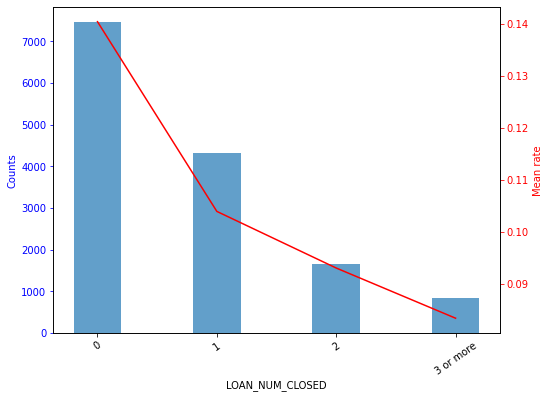

IV:  0.0424898763872289


,% responders,% non-responders,WOE,DG-DB,IV
1,0.260465,0.307741,-0.166791,-0.047276,0.007885
2,0.089535,0.119624,-0.289726,-0.030089,0.008718
0,0.608721,0.510433,0.176100,0.098288,0.017308
3 or more,0.041279,0.062201,-0.410021,-0.020922,0.008579


In [82]:
functions.feature_stat(data, 'LOAN_NUM_CLOSED', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_NUM_CLOSED')[0]

### LOAN_DLQ_NUM

In [83]:
data['LOAN_DLQ_NUM'].value_counts(dropna=False, normalize=True)

0     0.871603
1     0.094284
2     0.018633
3     0.006514
4     0.003362
5     0.002662
6     0.001121
7     0.000911
9     0.000280
8     0.000210
13    0.000140
10    0.000140
12    0.000070
11    0.000070
Name: LOAN_DLQ_NUM, dtype: float64

In [84]:
data['LOAN_DLQ_NUM'].cat.add_categories(['1 or more'], inplace=True)
data.loc[data['LOAN_DLQ_NUM'].isin([0]) == False, 'LOAN_DLQ_NUM'] = '1 or more'
data['LOAN_DLQ_NUM'] = data['LOAN_DLQ_NUM'].cat.remove_unused_categories()

Counts:
LOAN_DLQ_NUM
0            12443
1 or more     1833
Name: TARGET, dtype: int64
Frequencies:
0            0.871603
1 or more    0.128397
Name: LOAN_DLQ_NUM, dtype: float64


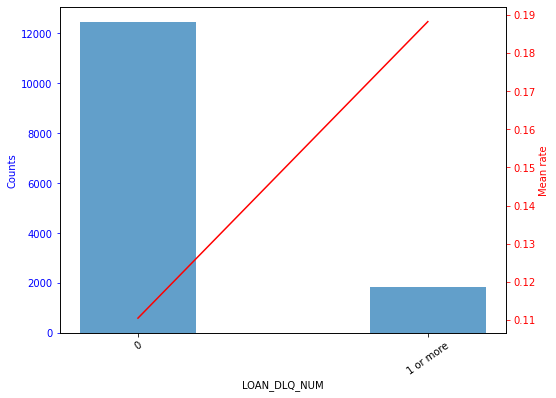

IV:  0.051209886005417614


,% responders,% non-responders,WOE,DG-DB,IV
1 or more,0.200581,0.118509,0.526231,0.082072,0.043189
0,0.799419,0.881491,-0.097730,-0.082072,0.008021


In [85]:
functions.feature_stat(data, 'LOAN_DLQ_NUM', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_DLQ_NUM')[0]

### LOAN_MAX_DLQ

In [86]:
data['LOAN_MAX_DLQ'].value_counts(dropna=False, normalize=True)

0    0.871603
1    0.125525
2    0.002171
3    0.000490
8    0.000070
6    0.000070
4    0.000070
Name: LOAN_MAX_DLQ, dtype: float64

In [87]:
data['LOAN_MAX_DLQ'].cat.add_categories(['1 or more'], inplace=True)
data.loc[data['LOAN_MAX_DLQ'].isin([0]) == False, 'LOAN_MAX_DLQ'] = '1 or more'
data['LOAN_MAX_DLQ'] = data['LOAN_MAX_DLQ'].cat.remove_unused_categories()

Counts:
LOAN_MAX_DLQ
0            12443
1 or more     1833
Name: TARGET, dtype: int64
Frequencies:
0            0.871603
1 or more    0.128397
Name: LOAN_MAX_DLQ, dtype: float64


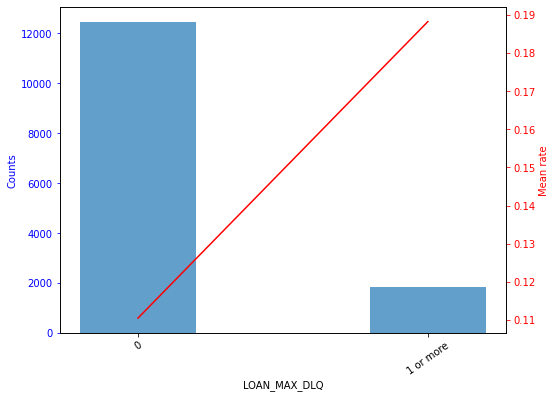

IV:  0.051209886005417614


,% responders,% non-responders,WOE,DG-DB,IV
1 or more,0.200581,0.118509,0.526231,0.082072,0.043189
0,0.799419,0.881491,-0.097730,-0.082072,0.008021


In [88]:
functions.feature_stat(data, 'LOAN_MAX_DLQ', 'TARGET')
functions.calc_iv(data, 'TARGET', 'LOAN_MAX_DLQ')[0]

In [89]:
data.head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,Income_to_limit
1,59910230,0,"(30.0, 34.0]",1,0,1,3 or more,2 or more,Some High School,Married,...,0,1,1,1,"(5.5, 6.5]",1 or more,1 or more,"(500.0, 15000.0]","(500.0, 15000.0]","(0.515, 0.783]"
2,59910525,0,"(50.0, 54.0]",1,0,1,3 or more,2 or more,Some High School,Married,...,0,1,2,1,"(6.5, 11.5]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(0.0, 0.515]"
3,59910803,0,"(38.0, 42.0]",1,0,1,1,1,Undergraduate Degree,Married,...,1,1,1,1,"(5.5, 6.5]",1 or more,1 or more,"(500.0, 15000.0]","(500.0, 15000.0]","(2.556, 16.706]"
4,59911781,0,"(26.0, 30.0]",1,0,0,0,2 or more,Some High School,Married,...,0,1,2,1,"(11.5, 110.0]",1 or more,1 or more,"(500.0, 15000.0]","(500.0, 15000.0]","(0.515, 0.783]"
5,59911784,0,"(26.0, 30.0]",1,0,0,0,2 or more,Some High School,Married,...,0,1,2,1,"(6.5, 11.5]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(0.0, 0.515]"
7,59912034,0,"(38.0, 42.0]",1,0,1,0,2 or more,Some High School,Married,...,1,1,2,1,"(6.5, 11.5]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(0.0, 0.515]"
9,59912659,0,"(42.0, 50.0]",1,0,1,0,2 or more,Professional School,Married,...,0,1,1,1,"(5.5, 6.5]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(1.428, 1.962]"
10,59912692,0,"(50.0, 54.0]",1,0,1,2,2 or more,Professional School,Single,...,0,1,1,1,"(0.0, 3.5]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(2.556, 16.706]"
11,59913108,1,"(0.0, 26.0]",1,0,0,0,2 or more,Professional School,Single,...,0,1,2,1,"(11.5, 110.0]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(1.428, 1.962]"
12,59913134,1,"(54.0, 67.0]",0,1,0,3 or more,2 or more,Some High School,Married,...,0,1,1,1,"(0.0, 3.5]",0,0,"(0.0, 500.0]","(0.0, 500.0]","(0.515, 0.783]"


# Feature selection based on IV


In [90]:
columns_to_try = [col for col in list(data.columns) if col not in ('AGREEMENT_RK', 'CARD_ID_SB8', 'CARD_NUM', 'TARGET')]

In [91]:
ivs = []
for col in columns_to_try:
    data[col] = data[col].astype('category')
    if data[col].isnull().any():
        print(col)
        if 'Unknown' not in data[col].cat.categories:
            data[col].cat.add_categories(['Unknown'], inplace=True)
        data[col].fillna('Unknown', inplace=True)
    data[col] = data[col].cat.remove_unused_categories()
    _, iv = functions.calc_iv(data, 'TARGET', col)
    ivs.append((col, np.round(iv, 4)))

In [92]:
good_cols = [i[0] for i in sorted(ivs, key=lambda tup: tup[1], reverse=True) if i[1] > 0.02]
for i in ['TARGET', 'AGREEMENT_RK']:
    good_cols.append(i)

In [93]:
good_cols

['AGE',
 'GEN_INDUSTRY',
 'WORK_TIME',
 'PERSONAL_INCOME',
 'GEN_PHONE_FL',
 'SOCSTATUS_PENS_FL',
 'SOCSTATUS_WORK_FL',
 'LOAN_AVG_DLQ_AMT',
 'LOAN_DLQ_NUM',
 'LOAN_MAX_DLQ',
 'LOAN_MAX_DLQ_AMT',
 'FACT_LIVING_TERM',
 'LOAN_NUM_CLOSED',
 'FST_PAYMENT',
 'TERM',
 'Income_to_limit',
 'LOAN_NUM_PAYM',
 'FAMILY_INCOME',
 'REG_FACT_POST_TP_FL',
 'TARGET',
 'AGREEMENT_RK']

# Some additional visualization

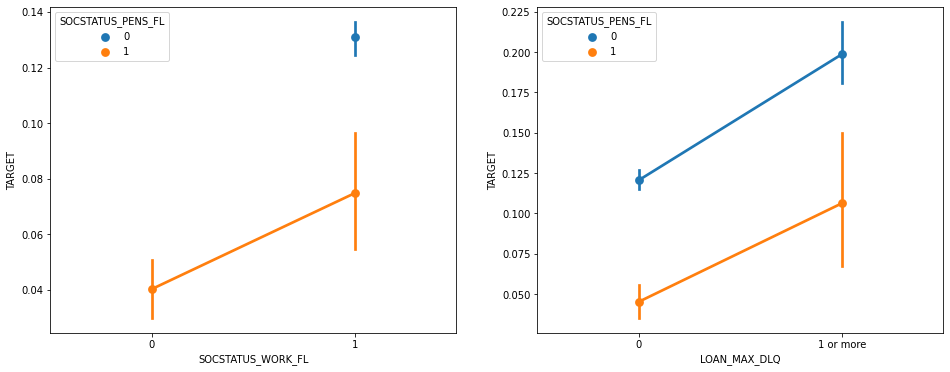

In [94]:
data_viz = data[good_cols]
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.pointplot(x='SOCSTATUS_WORK_FL', y="TARGET", hue='SOCSTATUS_PENS_FL', data=data_viz, ax=ax[0])
sns.pointplot(x='LOAN_MAX_DLQ', y="TARGET", hue='SOCSTATUS_PENS_FL', data=data_viz, ax=ax[1])

In [95]:
data['work_pens'] = 0
data.loc[data['SOCSTATUS_WORK_FL'] == 0, 'work_pens'] = 1
data.loc[(data['SOCSTATUS_WORK_FL'] == 1) & (data['SOCSTATUS_PENS_FL'] == 1), 'work_pens'] = 2
data.loc[(data['SOCSTATUS_WORK_FL'] == 1) & (data['SOCSTATUS_PENS_FL'] == 0), 'work_pens'] = 3

In [96]:
data['pens_dlq'] = 0
data.loc[(data['LOAN_MAX_DLQ'] == 0) & (data['SOCSTATUS_PENS_FL'] == 0), 'pens_dlq'] = 1
data.loc[(data['LOAN_MAX_DLQ'] == '1 or more') & (data['SOCSTATUS_PENS_FL'] == 1), 'pens_dlq'] = 2
data.loc[(data['LOAN_MAX_DLQ'] == 0) & (data['SOCSTATUS_PENS_FL'] == 0), 'pens_dlq'] = 3
data.loc[(data['LOAN_MAX_DLQ'] == '1 or more') & (data['SOCSTATUS_PENS_FL'] == 1), 'pens_dlq'] = 4

In [97]:
le = preprocessing.LabelEncoder()
for col in ['GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'OWN_AUTO',
            'FAMILY_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ']:
    initial_data[col] = initial_data[col].astype('category')
    if (initial_data[col].isnull() == True).any():
        initial_data[col].cat.add_categories(['Unknown'], inplace=True)
        initial_data[col].fillna('Unknown', inplace=True)
    initial_data[col] = le.fit_transform(initial_data[col])  

In [98]:
data_1 = initial_data[good_cols].drop(['AGREEMENT_RK'], axis=1)

In [99]:
print ('pearson correlation : \n',stats.pearsonr(x=data_1['LOAN_AVG_DLQ_AMT'], y=data_1['LOAN_MAX_DLQ_AMT']))

pearson correlation : 
 (0.9979249346514802, 0.0)


In [100]:
data.drop(['LOAN_AVG_DLQ_AMT'], axis=1, inplace=True)

In [101]:
columns_to_try = [col for col in list(data.columns) if col not in ('AGREEMENT_RK', 'CARD_ID_SB8', 'CARD_NUM', 'TARGET')]
ivs = []
for col in columns_to_try:
    data[col] = data[col].astype('category')
    if data[col].isnull().any():
        print(col)
        if 'Unknown' not in data[col].cat.categories:
            data[col].cat.add_categories(['Unknown'], inplace=True)
        data[col].fillna('Unknown', inplace=True)
    data[col] = data[col].cat.remove_unused_categories()
    _, iv = functions.calc_iv(data, 'TARGET', col)
    ivs.append((col, np.round(iv, 4)))
good_cols = [i[0] for i in sorted(ivs, key=lambda tup: tup[1], reverse=True) if i[1] > 0.02]
for i in ['TARGET', 'AGREEMENT_RK']:
    good_cols.append(i)
good_cols

['AGE',
 'GEN_INDUSTRY',
 'work_pens',
 'WORK_TIME',
 'PERSONAL_INCOME',
 'GEN_PHONE_FL',
 'SOCSTATUS_PENS_FL',
 'SOCSTATUS_WORK_FL',
 'LOAN_DLQ_NUM',
 'LOAN_MAX_DLQ',
 'LOAN_MAX_DLQ_AMT',
 'FACT_LIVING_TERM',
 'LOAN_NUM_CLOSED',
 'FST_PAYMENT',
 'TERM',
 'Income_to_limit',
 'LOAN_NUM_PAYM',
 'FAMILY_INCOME',
 'REG_FACT_POST_TP_FL',
 'TARGET',
 'AGREEMENT_RK']

In [102]:
columns_dummify = [col for col in good_cols if col not in ('TARGET', 'AGREEMENT_RK')]
data = data[good_cols]
for col in columns_dummify:
    data[col] = data[col].astype('category')
    dummies = pd.get_dummies(data[col])
    dummies = dummies.add_prefix('{}_:_'.format(col))
    data.drop([col], axis=1, inplace=True)
    data = data.join(dummies)

In [103]:
X = data.drop(['TARGET', 'AGREEMENT_RK'], axis=1)
Y = data['TARGET']

In [104]:
X.shape

(14276, 87)

In [106]:
sel = SelectKBest(chi2, k=30)
sel.fit(X,Y)

SelectKBest(k=30, score_func=<function chi2 at 0x1a19bea710>)

In [107]:
X_train_log = sel.transform(X)

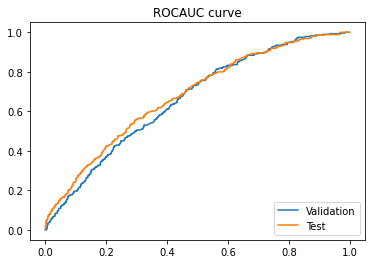

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_train_log, Y, test_size=0.2, stratify = Y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train)
logreg = linear_model.LogisticRegressionCV(class_weight='balanced', n_jobs=-1, fit_intercept=True)
logreg.fit(X_train, y_train)

y_pred_log_val = logreg.predict_proba(X_val)
y_pred_log_val_1 = [i[1] for i in y_pred_log_val]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_log_val_1)
plt.plot(fpr_val, tpr_val, label='Validation')
scores_val = cross_val_score(logreg, X_val, y_val, cv=5, scoring='roc_auc')

y_pred_log_test = logreg.predict_proba(X_test)
y_pred_log_test_1 = [i[1] for i in y_pred_log_test]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_log_test_1)
plt.plot(fpr_test, tpr_test, label='Test')
scores_test = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc')

plt.title('ROCAUC curve')
plt.legend(loc='lower right')

In [109]:
print('Validation auc: ', np.round(auc(fpr_val, tpr_val), 4))
print('Cross-validation: mean value is {0} with std {1}.'.format(np.round(np.mean(scores_val), 4),
                                                                 np.round(np.std(scores_val), 4)))
print('Test auc: ', np.round(auc(fpr_test, tpr_test), 4))
print('Cross-validation: mean value is {0} with std {1}.'.format(np.round(np.mean(scores_test), 4),
                                                                 np.round(np.std(scores_test), 4)))

Validation auc:  0.6602
Cross-validation: mean value is 0.6521 with std 0.0338.
Test auc:  0.6788
Cross-validation: mean value is 0.6744 with std 0.0301.


In [110]:
coefs = pd.DataFrame(list(zip(X[X.columns[sel.get_support()]].columns, logreg.coef_[0])),
             columns=['Feature', 'Coefficient'])
coefs

,Feature,Coefficient
0,"AGE_:_(0.0, 26.0]",0.102841
1,"AGE_:_(26.0, 30.0]",-0.028466
2,"AGE_:_(54.0, 67.0]",-0.265135
3,"GEN_INDUSTRY_:_Market, real estate",0.247194
4,GEN_INDUSTRY_:_Unknown,-1.329012
5,work_pens_:_1,0.943621
6,"WORK_TIME_:_(0.0, 6.5]",0.025188
7,"WORK_TIME_:_(6.5, 21.5]",0.328624
8,"WORK_TIME_:_(35.5, 53.5]",0.171679
9,"WORK_TIME_:_(151.0, 600.0]",-0.300350
